### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset.

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight.

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya.

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1.	Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2.	Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3.	blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4.	blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5.	blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6.	blueKills : Jumlah musuh yang dibunuh oleh tim biru
7.	blueDeaths : Jumlah kematian (tim biru)
8.	blueAssists : Jumlah assist kill (tim biru)
9.	blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10.	blueDragons : Jumlah naga yang dibunuh oleh tim biru
11.	blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12.	blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13.	blueTotalGold : Tim biru total emas
14.	blueAvgLevel : Tingkat juara rata-rata tim biru
15.	blueTotalExperience : Pengalaman total tim biru
16.	blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17.	blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18.	blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19.	blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20.	blueCSPerMin : CS tim biru (antek) per menit
21.	blueGoldPerMin : Emas tim biru per menit
22.	redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23.	redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24.	redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25.	redKills : Jumlah musuh yang dibunuh oleh tim merah
26.	redDeaths : Jumlah kematian (tim merah)
27.	redAssists: Jumlah assist kill (tim merah)
28.	redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29.	redDragons : Jumlah naga yang dibunuh oleh tim merah
30.	redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31.	redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32.	redTotalGold: Tim merah total emas
33.	redAvgLevel: Tingkat juara rata-rata tim merah
34.	redTotalExperience: Pengalaman total tim merah
35.	redTotalMinionsKilled : Total minion tim merah tewas (CS)
36.	redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37.	redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38.	redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39.	redCSPerMin : CS tim merah (antek) per menit
40.	redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Data
df = pd.read_csv("/content/high_diamond_ranked_10min.csv")
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
# Checking the shape of the data
df.shape

(9879, 40)

## 2. Basic EDA & Data Preprocessing

In [ ]:
# Checking null values
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [ ]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
df.loc[df['gameId'].duplicated()]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin


In [ ]:
#checking for quasi constants
print("Before drop duplicated data")
df.shape

Before drop duplicated data


(9879, 40)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
print("After drop duplicated data")
df.shape

After drop duplicated data


(9879, 40)

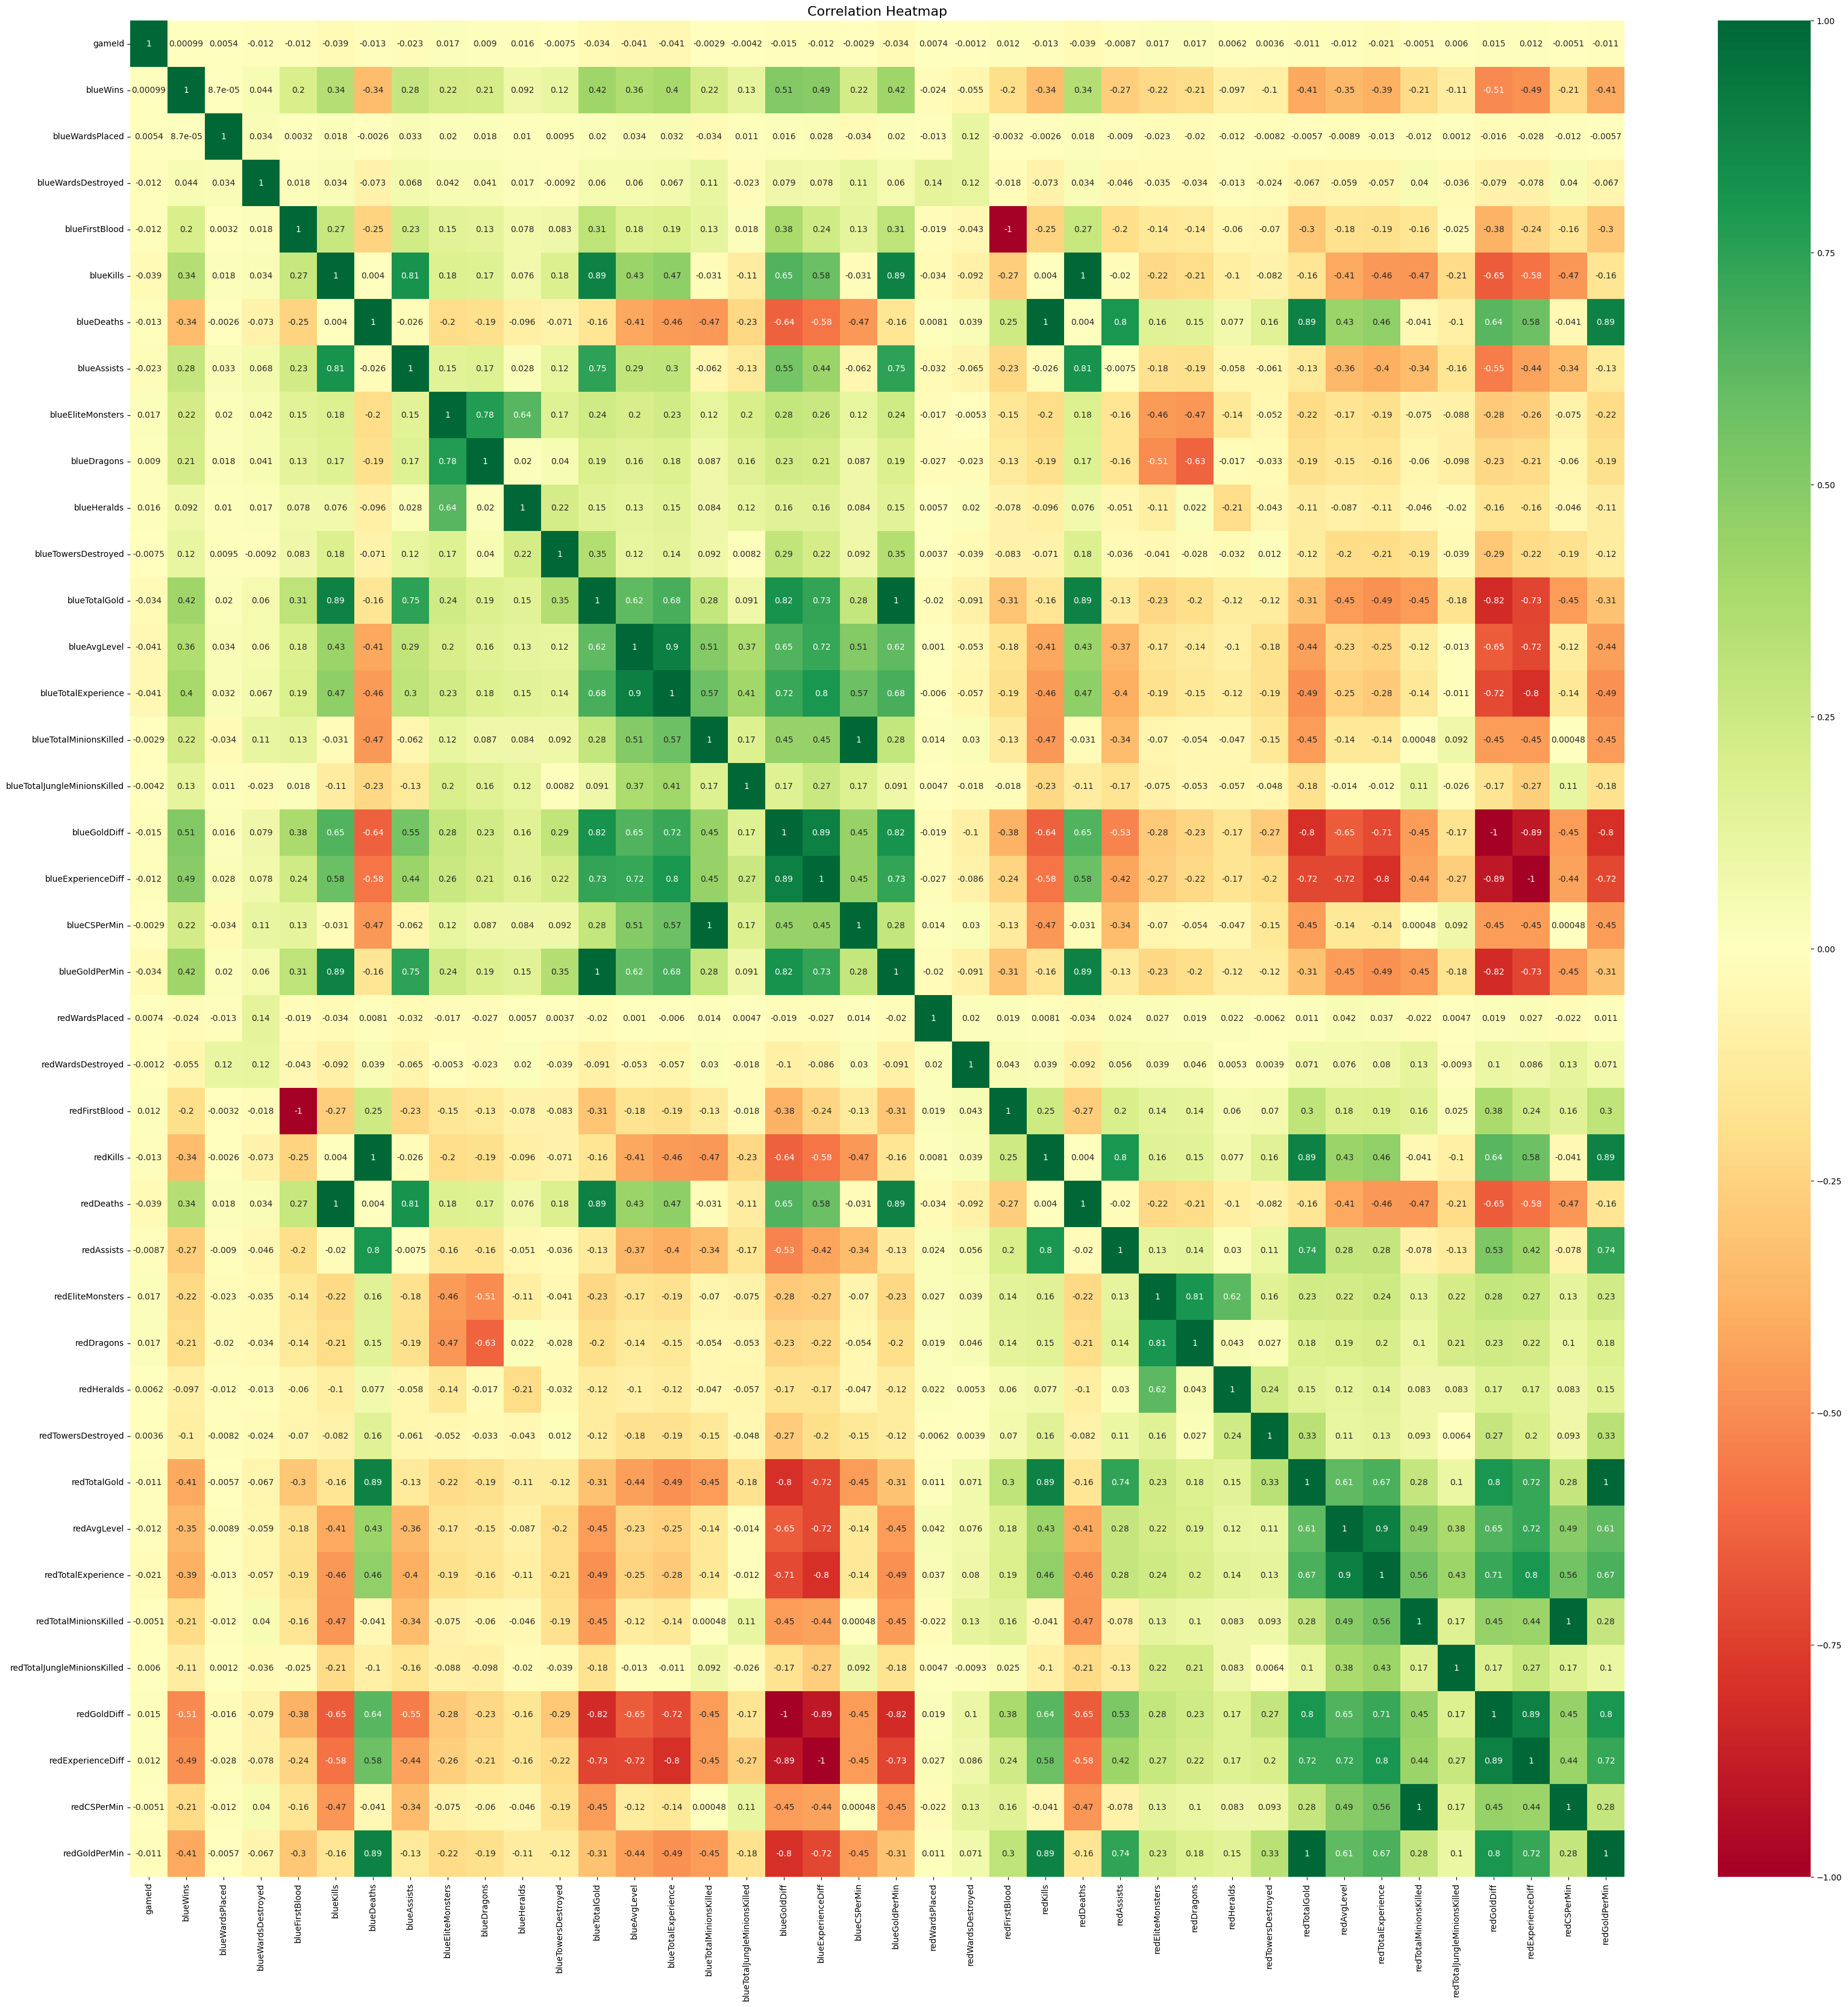

In [ ]:
# Bar plot of the outcomes to see how they are distributed
plt.figure(figsize=(40,40))
corr = df.corr()
corr.index = df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<Axes: xlabel='blueWins', ylabel='Count'>

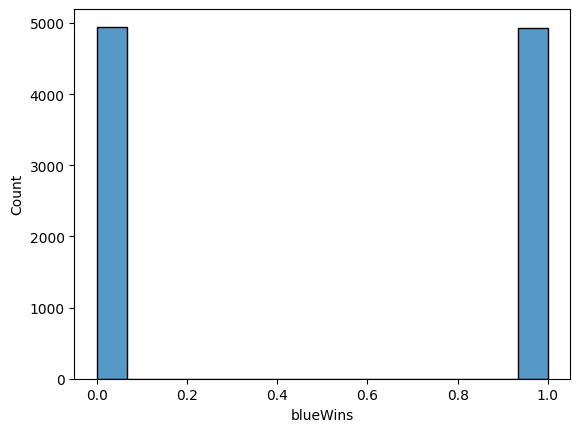

In [ ]:
# Value counts data blueWins
sns.histplot(df['blueWins'])

In [ ]:
df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

# Buatlah catatan dari hasil data preprocessing

#### Importing required libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix, accuracy_score

## 3. Data Splitting into train and test set

In [ ]:
# Assign 'TARGET' column to y
y = df['blueWins'].values
# Assign all columns except 'TARGET' to X
X = df.drop(['blueWins'], axis = 1).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (7903, 39)
y_train dataset:  (7903,)
X_test dataset:  (1976, 39)
y_test dataset:  (1976,)


In [ ]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

In [ ]:
#Random Forest Classification

rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.687246963562753


Feature Selection using Recursive feature extraction (RFE)

In [ ]:
# Init the transformer
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

# Fit to the training data
_ = rfe.fit(x_train, y_train)
print("Random Forest accuracy  :",_.score(x_test,y_test))

Random Forest accuracy  : 0.6973684210526315


## 5. Modelling and Evaluation


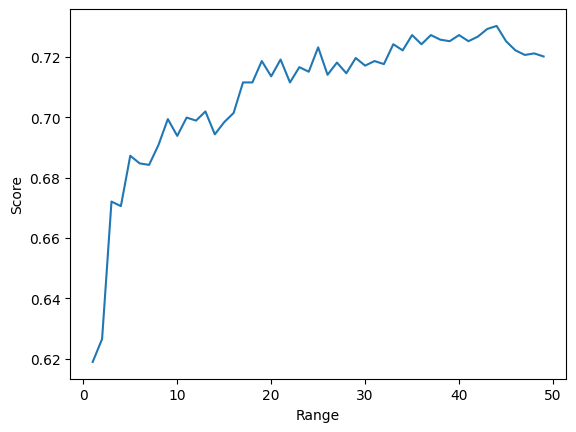

In [ ]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 47, random_state = 1) #set tree number
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 7 trees is :",accuracy_rf)

Random Forest accuracy for 7 trees is : 0.7206477732793523


In [ ]:

#Predict test data set
y_pred =rf_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[702 281]
 [271 722]]


0.7206477732793523

<Axes: >

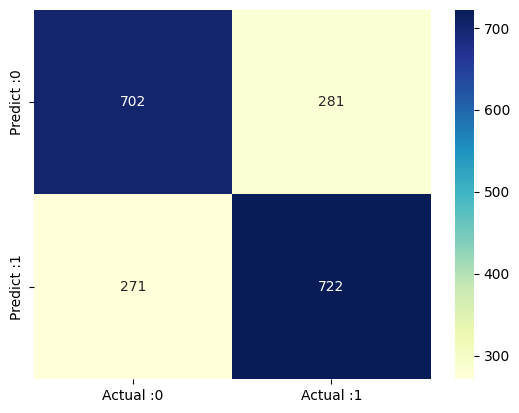

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1'],
                                 index=['Predict :0', 'Predict :1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       983
           1       0.72      0.73      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

